<h2 align='center'> Time Series with Pandas</h2>

<h3> In this program we will be working on Time Resampling </h3>

Time resampling can be thought as groupby operation but end up aggregating based off some sort of time frequency.

<b> For instance: </b> We can take daily data and resample into monthly data (maybe by taking average per month or sum per month)

In [2]:
# Import libraries
from datetime import datetime
import numpy as np
import pandas as pd

<h3> Read Dataset (Import Dataset)</h3>

In [3]:
#read dataset 'starbucks.csv'
df = pd.read_csv('starbucks.csv')

In [4]:
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [5]:
# We can read date column as time stamp in pandas and also set it to the index

df1 = pd.read_csv('starbucks.csv',index_col='Date')
df1.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [6]:
df1.info() #two columns Close and volume

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [7]:
df1.index # it is string now

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [8]:
# Now to have datetimeindex, we need to have parse_dates as True

df2 = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)
df2.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [9]:
df2.index # Now it is DateTimeIndex Format

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<h3> Resampling </h3>

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [10]:
#daily ---> yearly

df2.resample(rule='A').mean() 

#'A' stands for year end frequency (yearly data)
# will take mean/avergae of amount of volume used.

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


<i>Now we have average closing price and average volume used for every year </i>

<h3> Custom Resampling Functions </h3>

We're not limited to pandas built-in summary functions (min/max/mean/sum/std etc.). We can define our own function:

In [11]:
#Defining function that return first instance of the persiod regardless of the sampling rate

def first_day(entry):
    if len(entry) != 0: # is there is any entry or not and if so return first entry
        return entry[0]

In [12]:
df2.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [13]:
df2.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


Now the data seems to be in accordance with closing price and volume but <b> NOT </b> with Date format, so we need to be careful while defining our own custom function

<h3> Time Resampling Plotting </h3>

In [14]:
#Resample for a single column and then take a mean

df2['Close'].resample(rule='A').mean()

Date
2015-12-31    50.078100
2016-12-31    53.891732
2017-12-31    55.457310
2018-12-31    56.870005
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

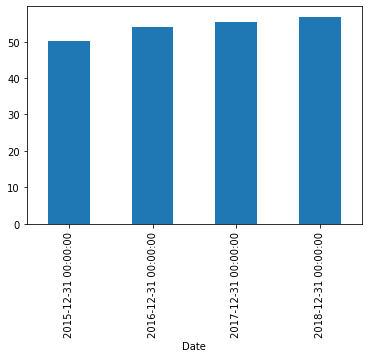

In [15]:
#Plot bar plot for it (Average closing price per year)
df2['Close'].resample(rule='A').mean().plot.bar()

<AxesSubplot:title={'center':'Yearly Mean Closing Price for Starbucks'}, xlabel='Date'>

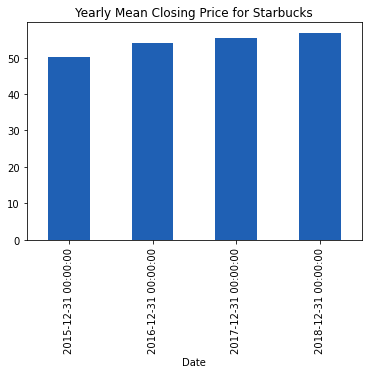

In [16]:
title = 'Yearly Mean Closing Price for Starbucks'
df2['Close'].resample(rule='A').mean().plot.bar(title=title,color=['#1f60b4'])

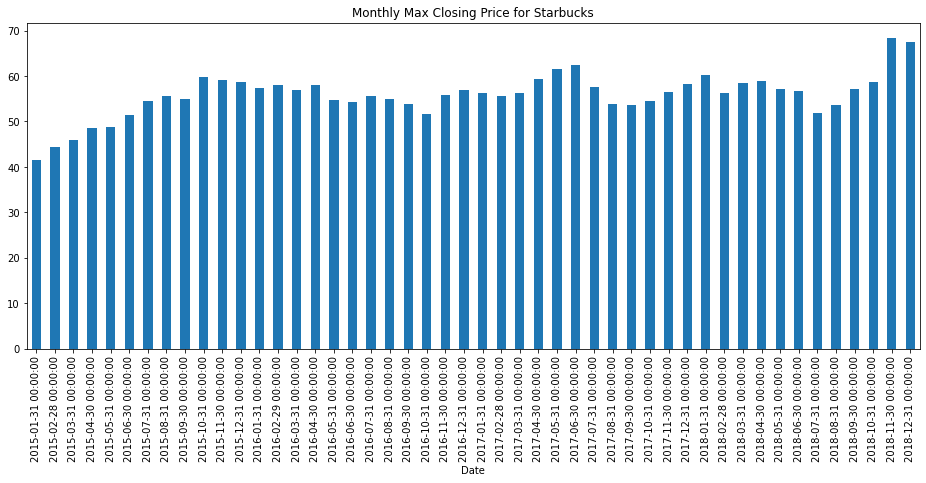

In [17]:
title = 'Monthly Max Closing Price for Starbucks'
df2['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title);